### Import the calibration package etc.

In [1]:
import sys
sys.path.append('../..')

import pyotc

PyOTC loaded.
Software version is: 0.3.1


/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Generate some data

In [2]:
from scipy import pi, sin, randn, exp, sinc, sqrt
from scipy import arange
from collections import OrderedDict

def gauss(x, x0, sig):
    return 1 / (sqrt(2 * pi * sig**2)) * exp(-0.5 * ((x - x0) / sig)**2)

fs = 102400

t = arange(0, 1, 1/fs)

x = OrderedDict()

x['gauss'] = 0.1 * gauss(t, 0.5, 0.125)
x['diff gauss'] = 0.2 * (0.5 - t) / (sqrt(2 * pi) * 0.125**2) * gauss(t, 0.5, 0.125)
x['sinc'] = sinc((t - 0.5)/0.02)**2
x['white noise'] = 0.2 * randn(len(t))
x['sin x exp'] = sin(2 * pi * 10 * t) * exp(-t/0.2)

### Plot the data

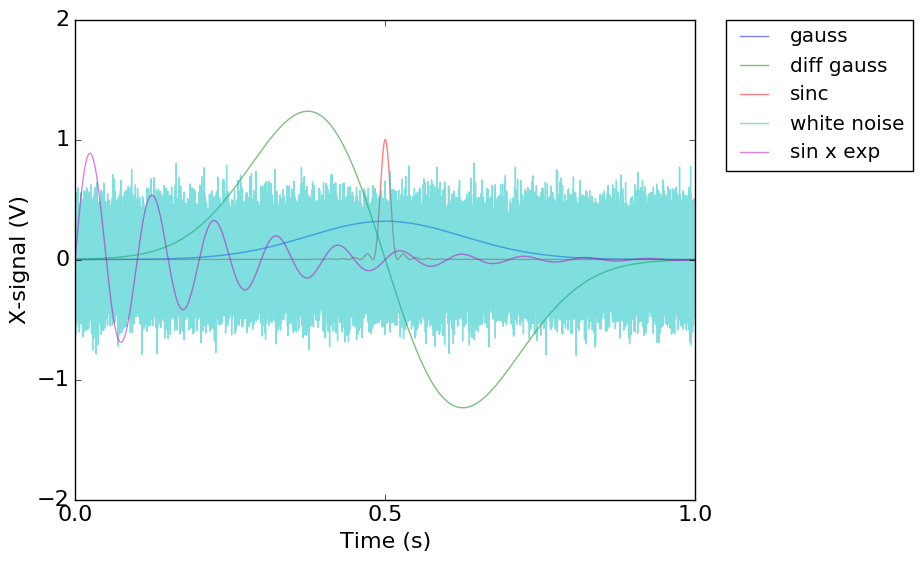

In [7]:
fig = pyotc.plt.figure()

for name, val in x.items():
    pyotc.add_plot_to_figure(fig, t, val, fmt='-', linewidth=1, alpha=0.5,
                             xlabel='Time (s)', ylabel='X-signal (V)', label=name,
                             showLegend=True)
pyotc.plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig

#### generate PSD objects

In [8]:
psd = OrderedDict()

for name, val in x.items():
    psd[name] = pyotc.gen_PSD_from_time_series(val, fs, 1, name=name) 

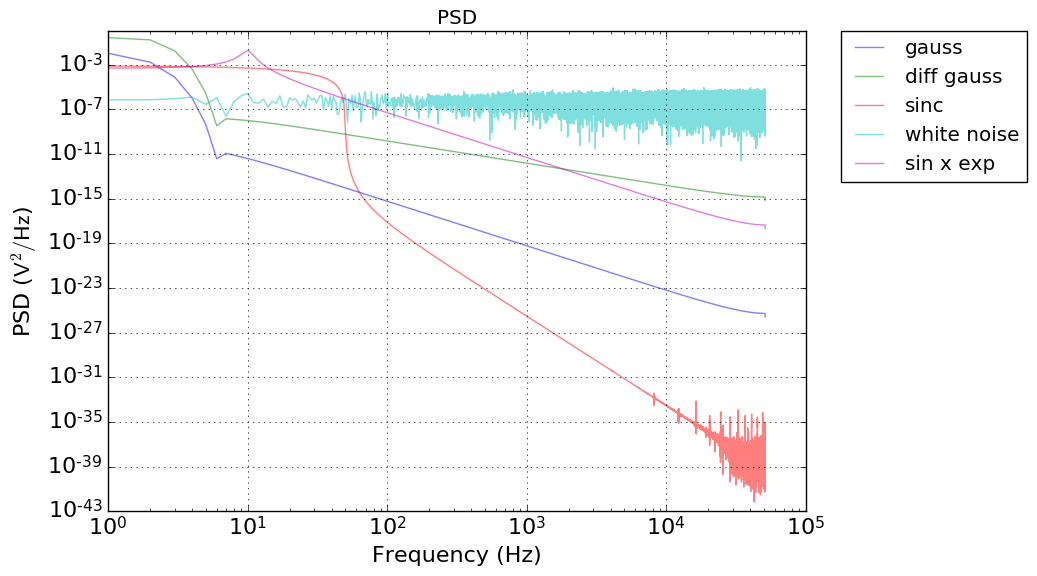

In [9]:
ax = None
for p in psd.values():
    fig = p.plot_psd(axis=ax)
    if ax is None:
        ax = fig.axes[0]
pyotc.plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('PSD')
fig

##  Check for Parseval's theorem

### left side of Parseval's theorem

In [10]:
for name, val in x.items():
    print('{0:10s} \t {1:1.16f}'.format(name, val.var()))

gauss      	 0.0125688498035416
diff gauss 	 0.4597427920354463
sinc       	 0.0129365654962446
white noise 	 0.0402097865349076
sin x exp  	 0.0494363423072054


### right side of Parseval's theorem

In [11]:
for name, val in psd.items():
    s = sum(val.get_psd())
    print('{0:10s} \t {1:1.16f}'.format(name, s))

gauss      	 0.0125688498035414
diff gauss 	 0.4597427920354775
sinc       	 0.0129365654962446
white noise 	 0.0402097865349077
sin x exp  	 0.0494363423072273


###  compare:

$$ Var(x(t)) - \sum P(f) \stackrel{!}{=} 0 $$

In [12]:
for name in x:
    print('{0:10s} \t {1: 1.3e}'.format(name, x[name].var() - sum(psd[name].get_psd())))

gauss      	  1.821e-16
diff gauss 	 -3.120e-14
sinc       	  6.765e-17
white noise 	 -2.776e-17
sin x exp  	 -2.193e-14


### approved